# Homework for statistics module

### Criteria (50 points total):
* Task 1 (17 points)

    * Requested formulas are provided - 4 points
    * All necessary experiments are done - 6 points
    * Results are analysed with commentaries - 7 points
* Tasks 2.1 и 2.2 (16 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 2 points
    * Results are analysed with commentaries - 4 points
* Task 3 (13 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 4 points
    * Data was aggregated properly - 2 points
    * Results are analysed with commentaries - 5 points
* Extra points:

    * 4 points in case clear, "pythonic" and understandable code style.

Good work: 40+ points.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('bmh')

from pylab import rcParams

%config InlineBackend.figure_format = 'svg'

# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

   Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to strata volumes;
- random selection according to the optimal sub-sampling.



## Solution for Task 1

### Formulas:

General formulas for expected value and variance:

**Mathematical Expectation**: $ E(X) = \int_{-\infty}^\infty XdF(X) $

**Variance**: $ D(X) = \int_{-\infty}^\infty (X- E(X))^2dF(X) $

#### Stratified sample point estimations:



In a stratified sample, the probability of an element to appear in the sample is proportional to the size of a respective stratum. This allows to continue the formulas for the mean and variance for our particular case: 

$$ E(X) = \int_{-\infty}^\infty XdF(X) = \int_{-\infty}^\infty Xd(a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)) $$

$$ D(X) = \int_{-\infty}^\infty (X- E(X))^2dF(X) = \int_{-\infty}^\infty (X- E(X))^2d(a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)) $$

Given the sizes of the stratas, we get the following weights:

$ a_1 = \frac{1 mln}{1 mln + 2 mln + 3 mln} = \frac{1}{6} $

$ a_2 = \frac{2 mln}{1 mln + 2 mln + 3 mln} = \frac{1}{3} $

$ a_3 = \frac{3 mln}{1 mln + 2 mln + 3 mln} = \frac{1}{2} $

which results in

$ E(X) = \frac{1}{6}\int_{-\infty}^\infty XdF(X_1) +\frac{1}{3}\int_{-\infty}^\infty XdF(X_2) + \frac{1}{2}\int_{-\infty}^\infty XdF(X_3) $

And respectively for a sample:

$ \bar{X} = \frac{1}{6}\bar{X_1} +\frac{1}{3}\bar{X_2} + \frac{1}{2}\bar{X_3} $

$ s^2 = \frac{1}{6}^2D(\bar{X_1}) +\frac{1}{3}^2D(\bar{X_2}) + \frac{1}{2}^2D(\bar{X_3}) $

#### Sample volumes if they are sampled proportionally:

By default, we can only choose $n=60$ people from the whole population.
The first method of allocation is proportional sampling from stratas. This method implies that the final sample is a mixture of stratas with the proportions of their sizes, where each strata is allocated $n_i = a_in $ places.

This way, given $a_1 = \frac{1}{6}, a_2 = \frac{1}{3},$ and $a_3 = \frac{1}{2}$, we get the proportions of 10, 20 and 30 for the stratas A, B, and C respectively. 

#### Sample volumes if they are optimal sampled (Neyman's method):

Neyman's method of allocation is aimed at minimization of the total sample variance by allocating the places proportionally to the weighted variance of the stratum:

$ n_i = n\frac{a_i\sigma_i}{\sum_{i=1}^{N}a_i\sigma_i} $

In our case, the proportions have the following specifications:

$ n_1 = 60\frac{\frac{1}{6}\sigma_1}{\frac{1}{6}\sigma_1+\frac{1}{3}\sigma_2+\frac{1}{2}\sigma_3} $

$ n_2 = 60\frac{\frac{1}{3}\sigma_2}{\frac{1}{6}\sigma_1+\frac{1}{3}\sigma_2+\frac{1}{2}\sigma_3} $

$ n_3 = 60\frac{\frac{1}{2}\sigma_3}{\frac{1}{6}\sigma_1+\frac{1}{3}\sigma_2+\frac{1}{2}\sigma_3} $


## TASK 2

In [3]:
from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS
brain_data = read_drive_dataset(*HOMEWORK_DATASETS['brain'])  # PART 1
cars_prefes_data = read_drive_dataset(*HOMEWORK_DATASETS['car_perfs'])  # PART 2

### PART 1 SOLUTION

In [4]:
brain_data.shape

(40, 7)

The dataset is rather small, 40 observations and 7 variables. 

In [5]:
brain_data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


In [6]:
brain_data.Weight = pd.to_numeric(brain_data['Weight'], errors="coerce")
brain_data.Height = pd.to_numeric(brain_data['Height'], errors="coerce")

The full description of the dataset can be found on the internet: https://www3.nd.edu/~busiforc/handouts/Data%20and%20Stories/correlation/Brain%20Size/brainsize.html 

- Gender: Male or Female
- FSIQ: Full Scale IQ scores based on the four Wechsler (1981) subtests
- VIQ: Verbal IQ scores based on the four Wechsler (1981) subtests
- PIQ: Performance IQ scores based on the four Wechsler (1981) subtests
- Weight: body weight in pounds
- Height: height in inches
- MRI_Count: total pixel Count [of the brain] from the 18 MRI scans

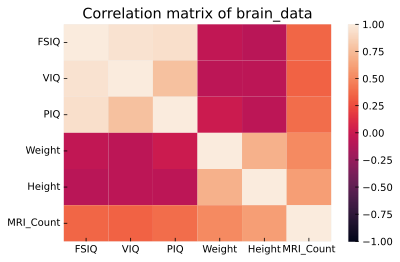

In [7]:
corrmat = brain_data.corr()
plt_211 = sns.heatmap(corrmat, vmin=-1)
plt_211.set_title("Correlation matrix of brain_data");

It is seen from the plot that brain size measure MRI_Count is positively correlated with all the 3 intelligence measures. It is also positively correlated with the size of the body.  

In [8]:
corrmat

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


From the matrix itself, we get that the Pearson's correlation between the MRI_Count as a measure of brain size and all the three measures of intelligence is slightly positive (~+0.35) when considering the whole sample.

Let's check the FSIQ (as a general measure of intelligence) differences by gender visually.

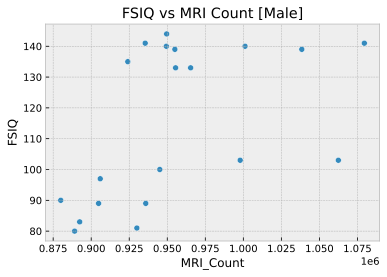

In [9]:
plt_212 = sns.scatterplot(x="MRI_Count", y="FSIQ", data=brain_data[brain_data['Gender']=="Male"])
plt_212.set_title("FSIQ vs MRI Count [Male]");

This plot might suggest that there is positive association between the brain size and a measure of intelligence for men. 

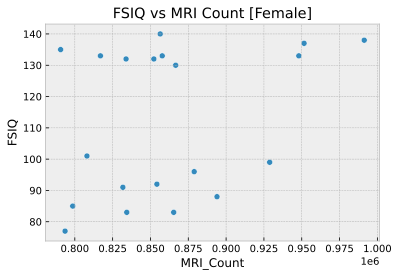

In [10]:
plt_213 = sns.scatterplot(x="MRI_Count", y="FSIQ", data=brain_data[brain_data['Gender']=="Female"])
plt_213.set_title("FSIQ vs MRI Count [Female]");

However, with women it is not clear whether any correlation is present. Most likely, it is very small since no clear dependence is observed. Let's check the correlation matrices for Male and Female.

In [11]:
corrmat_male = brain_data[brain_data['Gender']=='Male'].corr()
corrmat_female = brain_data[brain_data['Gender']=='Female'].corr()

In [12]:
corrmat_male.MRI_Count

FSIQ         0.498369
VIQ          0.413105
PIQ          0.568237
Weight      -0.076875
Height       0.301543
MRI_Count    1.000000
Name: MRI_Count, dtype: float64

In [13]:
corrmat_female.MRI_Count

FSIQ         0.325697
VIQ          0.254933
PIQ          0.396157
Weight       0.446271
Height       0.174541
MRI_Count    1.000000
Name: MRI_Count, dtype: float64

It is clear that the respective correlation values between genders are different, but the differences are not yet shown to be statistically significant.

### PART 2 SOLUTION

In [14]:
cars_prefes_data.shape

(300, 22)

In [15]:
cars_prefes_data.head()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,...,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,...,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,...,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,...,3,4,3,3,2,3,3,2,3,3


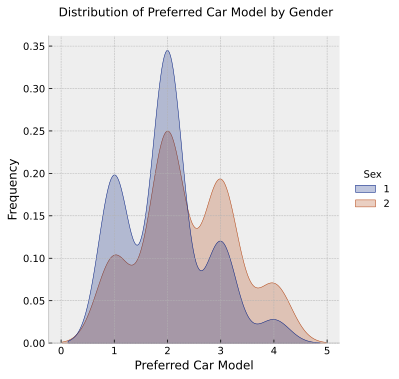

In [55]:
g = sns.displot(x=cars_prefes_data['PreferCar'], 
                       kind='kde',
                       data=cars_prefes_data,
                       hue = 'Sex',
                       palette="dark",
                      fill=True)

#plt_221a.set_title('Distribution of Preferred Car Model by Gender')


g.set(xlabel='Preferred Car Model', ylabel='Frequency')
g.fig.suptitle('Distribution of Preferred Car Model by Gender', y=1.05);

From the plot we can see that the distributions are considerably different. However, we need a formal test to conclude whether there is statistically significant difference of preffered car models between the two genders. For this purpose, we are going to run a Chi2 test. 

To run the **Chi2** test, we need to transform the data for the test to compare two sets of numbers: 'actual' observations vs 'expected' values. In our case, a reasonable null hypothesis would be to consider that both genders have the same preferences, i.e. that the frequencies of bought car models would be the same for Male and Female buyers. 
This way, we can set Female frequences as the 'default' or 'expected' ones while Male frequences would be the 'observed' ones. This can be done through a contigency table.

In [56]:
contigency_tab21 = pd.crosstab(cars_prefes_data['Sex'], cars_prefes_data['PreferCar'])
contigency_tab21

PreferCar,1,2,3,4
Sex,,,,
1,43,75,26,6
2,25,61,47,17


Now we can pass the table to the corresponding function and run the test.

In [57]:
st.chi2_contingency(contigency_tab21)

(17.507847808569526,
 0.0005555699275518034,
 3,
 array([[34. , 68. , 36.5, 11.5],
        [34. , 68. , 36.5, 11.5]]))

Interpretation: p-value = 0.055% < 1%

We can reject the null hypothesis that the choice of car does NOT differ by gender at 1%, 5% and 10% alpha-levels given the p-value. Therefore, from the given sample we can conclude that car model preferences vary considerably by gender of the buyer. 

# Task 3

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented) 
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [70]:
df = pd.read_csv(r"C:\Users\1\Desktop\master.csv")

In [148]:
df.shape

(27820, 12)

In [73]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Task 3. Part 1.1

Next we will choose the country of interest. In my case, the country of interest is Belarus. Not only is it my birthplace but also one of the leaders in suicide rates in Europe. 

In [78]:
df_bel = df[df["country"]=="Belarus"]

In [79]:
df_bel.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
3188,Belarus,1990,male,35-54 years,729,1199400,60.78,Belarus1990,NaN,"21,650,000,000",2301,Silent
3189,Belarus,1990,male,55-74 years,363,714100,50.83,Belarus1990,NaN,"21,650,000,000",2301,G.I. Generation
3190,Belarus,1990,male,75+ years,59,123400,47.81,Belarus1990,NaN,"21,650,000,000",2301,G.I. Generation
3191,Belarus,1990,male,25-34 years,359,844900,42.49,Belarus1990,NaN,"21,650,000,000",2301,Boomers
3192,Belarus,1990,male,15-24 years,132,702900,18.78,Belarus1990,NaN,"21,650,000,000",2301,Generation X


Let's check the dynamics of the total suicide rates by year.

In [129]:
df_bel_y = df_bel.groupby(["year"])["suicides_no"].sum().reset_index()

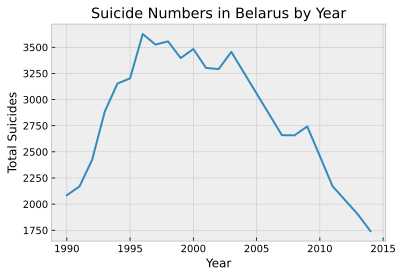

In [131]:
plt_311 = sns.lineplot(data=df_bel_y, x="year", y="suicides_no")
plt_311.set(xlabel='Year', ylabel='Total Suicides')
plt_311.set_title("Suicide Numbers in Belarus by Year");

Seems like there was a sharp increase in the 90s, a time right after the collapse of the USSR. One of the reasons could be harsh economic conditions of the time common for all the post-soviet countries.
A sharp decline from 2004 might be as well attributed to the rapid economic development. Another argument for the association between the suicide numbers and the state of economy is the increasing values of suicides just around the world financial crisis of 2007-2008.  

Let's see if there are any significant differences in mean suicide numbers by age group. 

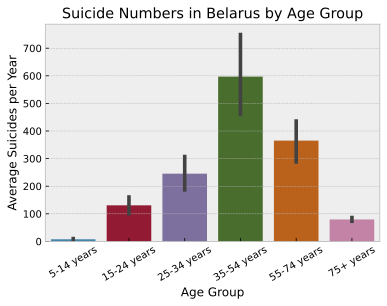

In [127]:
plt_312 = sns.barplot(data=df_bel, x="age", y="suicides_no", order=['5-14 years', '15-24 years', '25-34 years',
                                                                  '35-54 years', '55-74 years', '75+ years'])
plt_312.set(xlabel='Age Group', ylabel='Average Suicides per Year')
plt_312.set_title("Suicide Numbers in Belarus by Age Group")
plt.setp(plt_2.get_xticklabels(), rotation=30);

There are clear significant differences in suicide rates across the age groups in Belarus. People above 35 y.o. and below 75 y.o. show by far the largest numbers of suicides in Belarus. This might be attributed to the time period of the data since it captures the period of the 90s when most of the suicides were presumably with adults who got the responsibility to feed the family during harsh times. This could as well be a general tendency, but more data on other time periods would need to be collected and analyzed to conclude that.  

We can as well check the mean values of suicide numbers by gender.

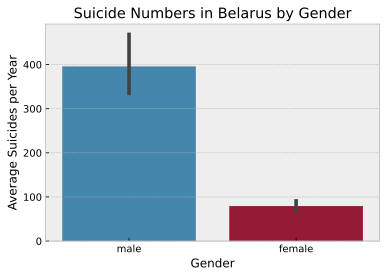

In [124]:
plt_313 = sns.barplot(data=df_bel, x="sex", y="suicides_no")
plt_313.set(xlabel='Gender', ylabel='Average Suicides per Year')
plt_313.set_title("Suicide Numbers in Belarus by Gender");

As expected, the average suicide rates are way higher for men than for women. This is a world-wide tendency attributable not only to Belarus. 

## Task 3. Part 1.2

In [144]:
contingency_tab_3 = df_bel.groupby(['sex', 'year'])["suicides_no"].sum().unstack()
contingency_tab_3

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2007,2008,2009,2010,2011,2013,2014
sex,,,,,,,,,,,,,,,,,,,,,
female,435,442,470,525,571,514,546,562,550,529,...,490,511,540,456,471,505,390,380,334,276
male,1650,1727,1954,2360,2582,2689,3081,2964,3006,2868,...,2813,2780,2916,2203,2187,2238,2069,1792,1568,1465


In [146]:
st.chi2_contingency(contingency_tab_3) 

(124.1382207322206,
 4.8590297462323276e-17,
 20,
 array([[ 348.19625326,  362.22430375,  404.80945702,  481.79673412,
          526.55289521,  534.90292527,  605.71118012,  588.84411941,
          593.85413745,  567.30104188,  581.66309357,  551.60298537,
          549.59897816,  577.15407734,  444.05459828,  443.88759768,
          458.08264877,  410.65447806,  362.72530555,  317.63514326,
          290.74804648],
        [1736.80374674, 1806.77569625, 2019.19054298, 2403.20326588,
         2626.44710479, 2668.09707473, 3021.28881988, 2937.15588059,
         2962.14586255, 2829.69895812, 2901.33690643, 2751.39701463,
         2741.40102184, 2878.84592266, 2214.94540172, 2214.11240232,
         2284.91735123, 2048.34552194, 1809.27469445, 1584.36485674,
         1450.25195352]]))

Interpretation: p-value = $4.859^{-17}$

We can reject the null hypothesis that the suicide numbers in Belarus by year do NOT differ by gender at 1%, 5% and 10% alpha-levels given the p-value. Therefore, we can conclude that for the given timeframe the rates by gender are different. However, we cannot infere this conclusion to a general population of males and females (i.e. not only from the given timeframe). 

## Task 3. Part 2

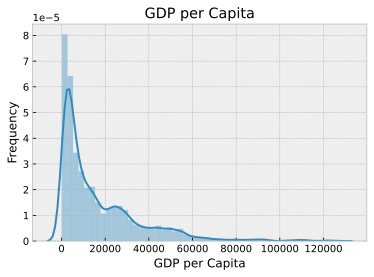

In [174]:
plt_321 = sns.distplot(df['gdp_per_capita ($)'])
plt_321.set(xlabel='GDP per Capita', ylabel='Frequency')
plt_321.set_title("GDP per Capita");

We can see that the data is clearly positively skewed, and the distribution is far from normal. To proceed with the analysis, we need to transform the data.

In [159]:
df['log_gpd_per_cap'] = np.log(df['gdp_per_capita ($)'])

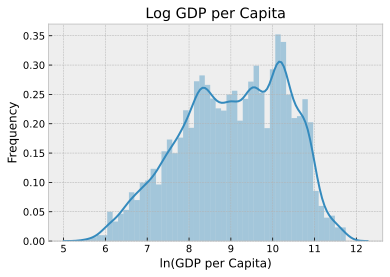

In [172]:
plt_322 = sns.distplot(df['log_gpd_per_cap'])
plt_322.set(xlabel='ln(GDP per Capita)', ylabel='Frequency')
plt_322.set_title("Log GDP per Capita");

As it is seen on the plot, the transformed gdp per capita values are much closer to normal distribution.

Now let's check the suicide numbers by logarithm of gdp per capita in 2016.

In [167]:
df_2016 = df[df['year']==2016]
df_2016.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,log_gpd_per_cap
1248,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,NaN,"10,546,135,160",3788,Silent,8.239593
1249,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,"10,546,135,160",3788,Boomers,8.239593
1250,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,NaN,"10,546,135,160",3788,Generation X,8.239593
1251,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,NaN,"10,546,135,160",3788,Millenials,8.239593
1252,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,NaN,"10,546,135,160",3788,Silent,8.239593


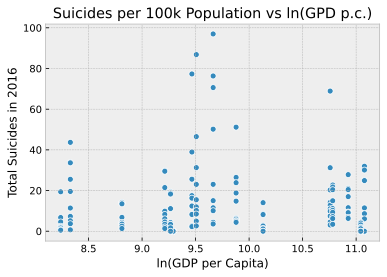

In [176]:
plt_323 = sns.scatterplot(data=df_2016, x='log_gpd_per_cap', y='suicides/100k pop')
plt_323.set(xlabel='ln(GDP per Capita)', ylabel='Total Suicides in 2016')
plt_323.set_title("Suicides per 100k Population vs ln(GPD p.c.)");

From the scatterplot, we can see that the data can be divided into several clusters.